## Title

**Abstract:**
One-sentence description

**Description:**
In the following cell, I...


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import sys
import os

sys.path.append("..")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'white'

from config import ROOT

/Users/songshgeo/opt/anaconda3/envs/WAInstitution_YRB_2021/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
os.chdir(ROOT)

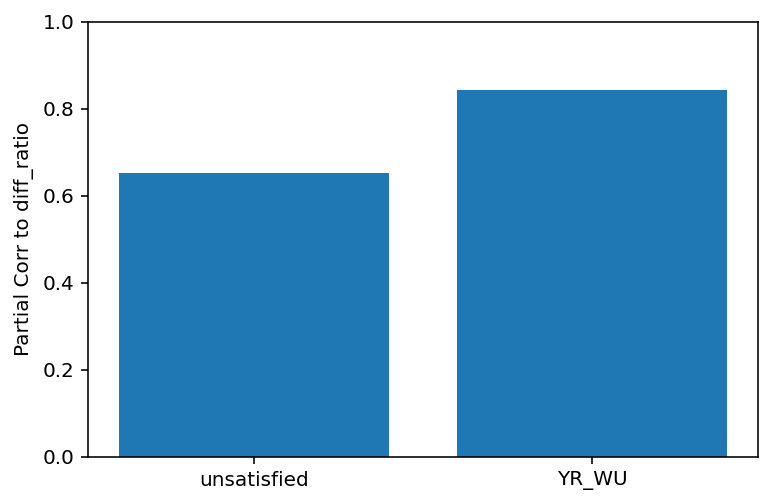

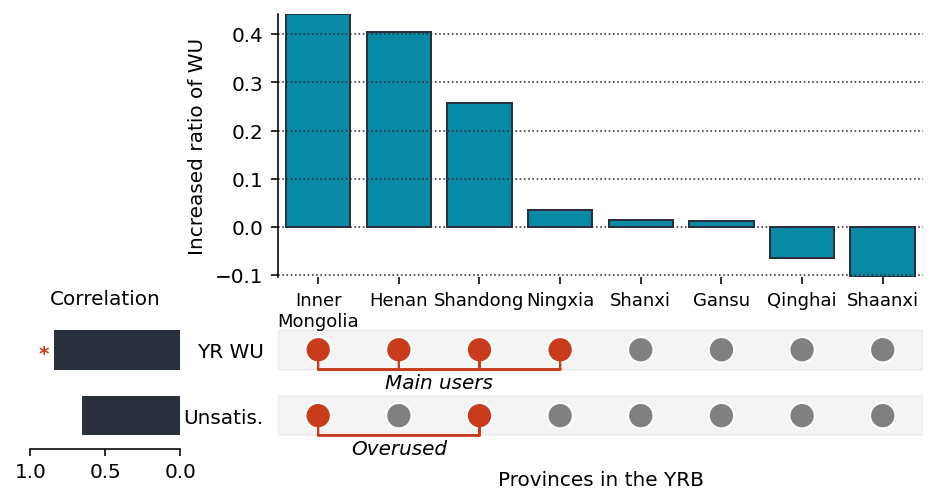

In [3]:
from func.handle import ExpResultsHandler

YAML_87 = "reports/n1987/87_all_wci.yaml"
exp87 = ExpResultsHandler(yaml_file=YAML_87)
exp87.load_from_pickle()

statistic = exp87.get_statistic_df()

xs = ['unsatisfied', 'YR_WU']
corrs, p_vals = exp87.correlation_analysis(xs=['unsatisfied', 'YR_WU'], y='diff_ratio')
bools = [
    statistic['YR_WU'] > statistic['scheme87'], 
    statistic['YR_WU'] > statistic['YR_WU'].median(),
]
notes = ['test1', 'test2']

items = list(zip(['Unsatis.', 'YR WU'], bools, ['Overused', 'Main users'], corrs, p_vals))
ax1, ax2, ax3 = exp87.plot_upset(items)

claen_labels = []
for label in ax1.get_xticklabels():
    text = label.get_text()
    if text == "Neimeng":
        text = 'Inner\nMongolia'
    elif text == 'Shanxi':
        text = 'Shaanxi'
    elif text == 'Shaanxi':
        text = 'Shanxi'
    claen_labels.append(text)
ax1.set_xticklabels(claen_labels)

plt.savefig("figs/outputs/upset_87.pdf", format='pdf')
plt.show();

In [4]:
statistic

,diff_sum,diff_ratio,Total_WU,YR_WU,ratio,scheme83,scheme87,plan,satisfied,unsatisfied,stress,punished
Neimeng,35.738608,0.442456,134.543281,64.390909,0.490167,62.0,58.6,148.9,0.393553,0.606447,39.049692,3.4
Henan,32.644593,0.404151,223.370984,35.845455,0.162813,58.0,55.4,111.8,0.495528,0.504472,18.083038,2.6
Shandong,20.752778,0.256927,246.881959,87.818182,0.357389,75.0,70.0,84.0,0.833333,0.166667,14.636364,5.0
Gansu,1.076088,0.013322,109.615348,23.400000,0.213880,30.0,30.4,73.5,0.413605,0.586395,13.721633,-0.4
Ningxia,2.942830,0.036433,82.124035,34.890909,0.425983,40.0,40.0,60.5,0.661157,0.338843,11.822539,0.0
Shaanxi,1.201178,0.014871,64.971583,12.581818,0.195459,43.0,38.0,115.0,0.330435,0.669565,8.424348,5.0
Qinghai,-5.175475,-0.064074,24.302303,12.136364,0.500318,14.0,14.1,35.7,0.394958,0.605042,7.343010,-0.1
Shanxi,-8.407408,-0.104087,58.150938,19.718182,0.339904,52.0,43.1,60.8,0.708882,0.291118,5.740326,8.9


In [5]:
corrs

[0.6521976768312112, 0.8429088825319152]